In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df= pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')

In [3]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.Product_Category.unique()

array(['Auto', 'Hand & Power Tools', 'Stationery', 'Tupperware',
       'Footwear & Shoes', 'Furniture', 'Food', 'Games & Toys',
       'Sports Products', 'Books', 'Electronics & Gadgets', 'Decor',
       'Clothing & Apparel', 'Beauty', 'Household items', 'Pet Care',
       'Veterinary', 'Office'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
df.drop(columns= ['Status', 'unnamed1', 'User_ID', 'Cust_name', 'Product_ID', 'Age'], inplace= True)

In [8]:
df.head()

,Gender,Age Group,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,F,26-35,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,F,26-35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,F,26-35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,M,0-17,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,M,26-35,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [9]:
df.isna().sum()

Gender               0
Age Group            0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [10]:
df.dropna(inplace= True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            11239 non-null  object 
 1   Age Group         11239 non-null  object 
 2   Marital_Status    11239 non-null  int64  
 3   State             11239 non-null  object 
 4   Zone              11239 non-null  object 
 5   Occupation        11239 non-null  object 
 6   Product_Category  11239 non-null  object 
 7   Orders            11239 non-null  int64  
 8   Amount            11239 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 878.0+ KB


In [12]:
df.describe()

,Marital_Status,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,0.420055,2.489634,9453.610858
std,0.493589,1.114967,5222.355869
min,0.000000,1.000000,188.000000
25%,0.000000,2.000000,5443.000000
50%,0.000000,2.000000,8109.000000
75%,1.000000,3.000000,12675.000000
max,1.000000,4.000000,23952.000000


# Exploratory Data Analysis


## Gender

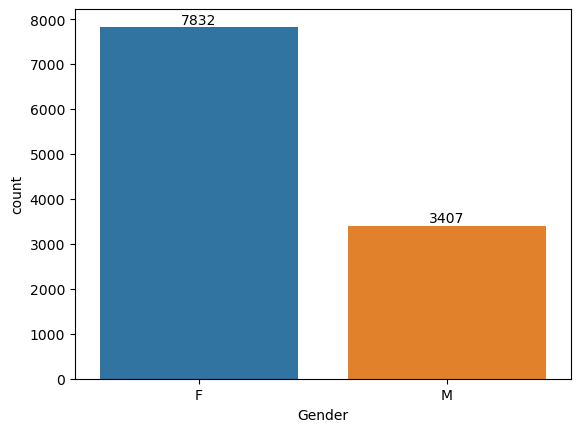

In [16]:
# plotting a bar chart for Gender and it's count
ax= sns.countplot(data= df, x= "Gender")
for bars in ax.containers:
    ax.bar_label(bars)

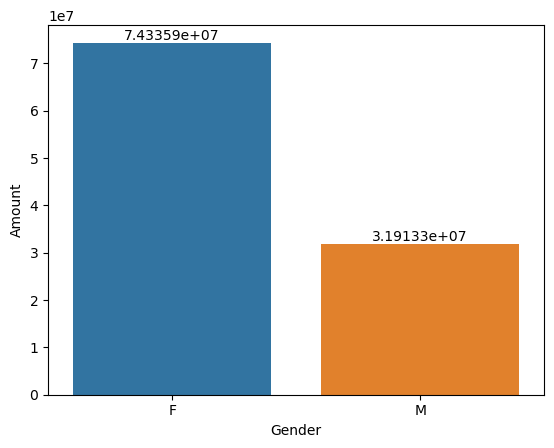

In [24]:
#plotting a bar chart for gender vs total amount
sales_gen= df.groupby('Gender', as_index= False)['Amount'].sum().sort_values(by= 'Amount', ascending= False)
ax= sns.barplot(data= sales_gen , x= 'Gender', y='Amount')
for bars in ax.containers:
    ax.bar_label(bars)


From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

## Age

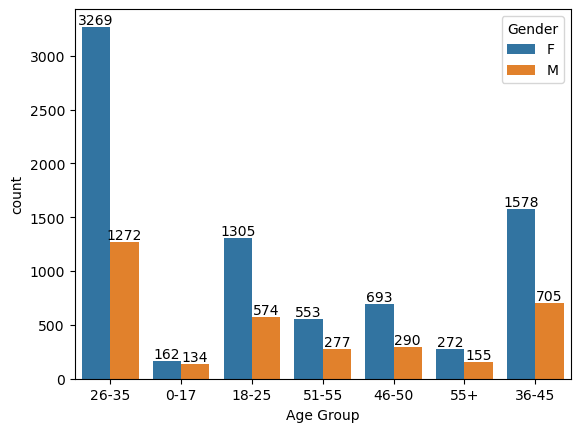

In [26]:
ax= sns.countplot(data= df, x= 'Age Group', hue= 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

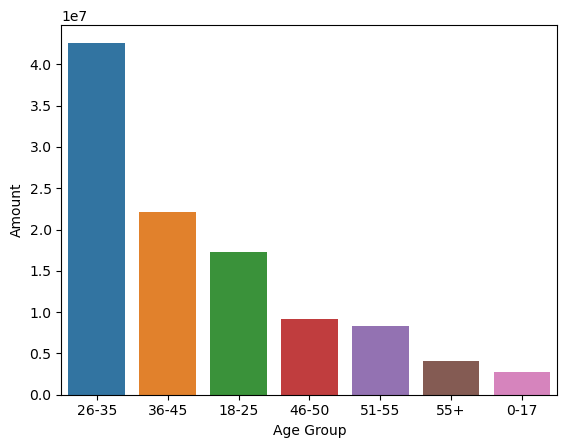

In [30]:
sales_age= df.groupby('Age Group', as_index= False)['Amount'].sum().sort_values(by= 'Amount', ascending= False)
sns.barplot(data= sales_age, x= 'Age Group', y= 'Amount')

From above graphs we can see that most of the buyers are of age group between 26-35 yrs female

## State

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Uttar Pradesh'),
  Text(1, 0, 'Maharashtra'),
  Text(2, 0, 'Karnataka'),
  Text(3, 0, 'Delhi'),
  Text(4, 0, 'Madhya Pradesh'),
  Text(5, 0, 'Andhra\xa0Pradesh'),
  Text(6, 0, 'Himachal Pradesh'),
  Text(7, 0, 'Kerala'),
  Text(8, 0, 'Haryana'),
  Text(9, 0, 'Gujarat')])

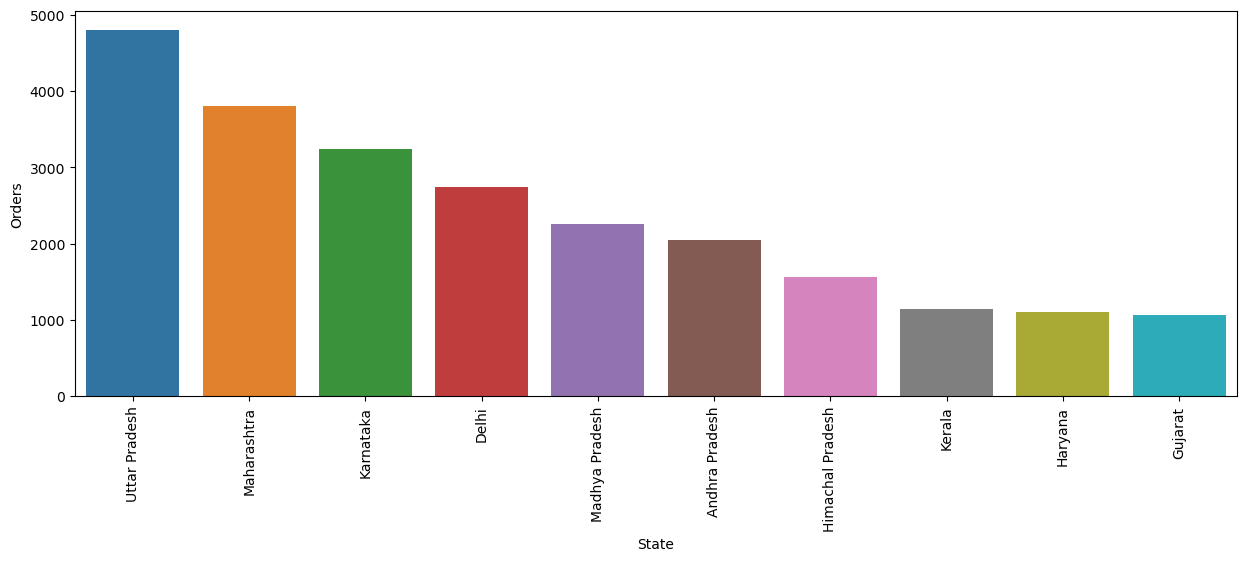

In [39]:
plt.figure(figsize=(15, 5))
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.barplot(data = sales_state, x = 'State',y= 'Orders')
plt.xticks(rotation= 'vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Uttar Pradesh'),
  Text(1, 0, 'Maharashtra'),
  Text(2, 0, 'Karnataka'),
  Text(3, 0, 'Delhi'),
  Text(4, 0, 'Madhya Pradesh'),
  Text(5, 0, 'Andhra\xa0Pradesh'),
  Text(6, 0, 'Himachal Pradesh'),
  Text(7, 0, 'Haryana'),
  Text(8, 0, 'Bihar'),
  Text(9, 0, 'Gujarat'),
  Text(10, 0, 'Kerala'),
  Text(11, 0, 'Jharkhand'),
  Text(12, 0, 'Uttarakhand'),
  Text(13, 0, 'Rajasthan'),
  Text(14, 0, 'Punjab'),
  Text(15, 0, 'Telangana')])

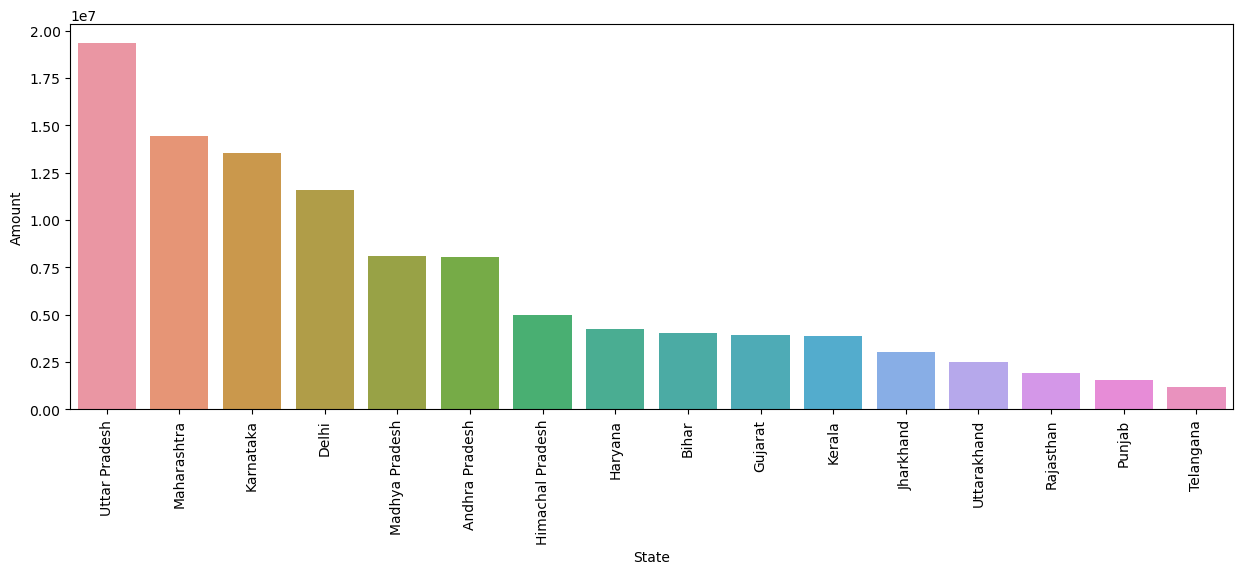

In [37]:
plt.figure(figsize=(15, 5))
sales_state= df.groupby('State', as_index= False)['Amount'].sum().sort_values(by= 'Amount', ascending= False)
sns.barplot(data= sale_state, x= 'State', y= 'Amount')
plt.xticks(rotation= 'vertical')

From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

## Marital State

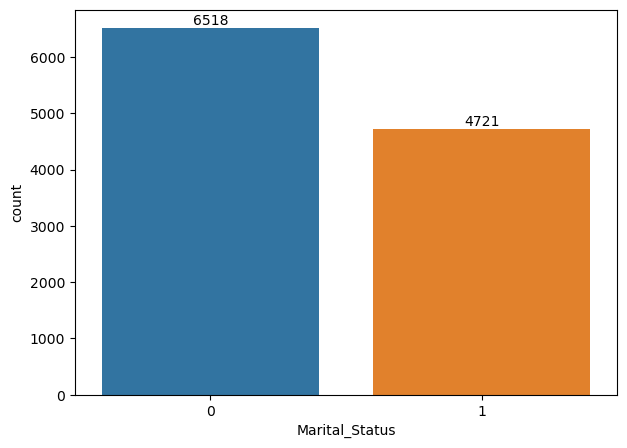

In [41]:
plt.figure(figsize=(7, 5))
ax = sns.countplot(data = df, x = 'Marital_Status')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

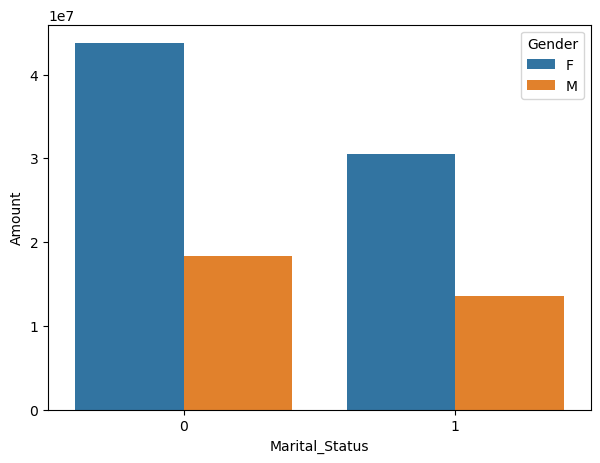

In [42]:
plt.figure(figsize=(7, 5))
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

From above graphs we can see that most of the buyers are unmarried (women) and they have high purchasing power

## Occupation

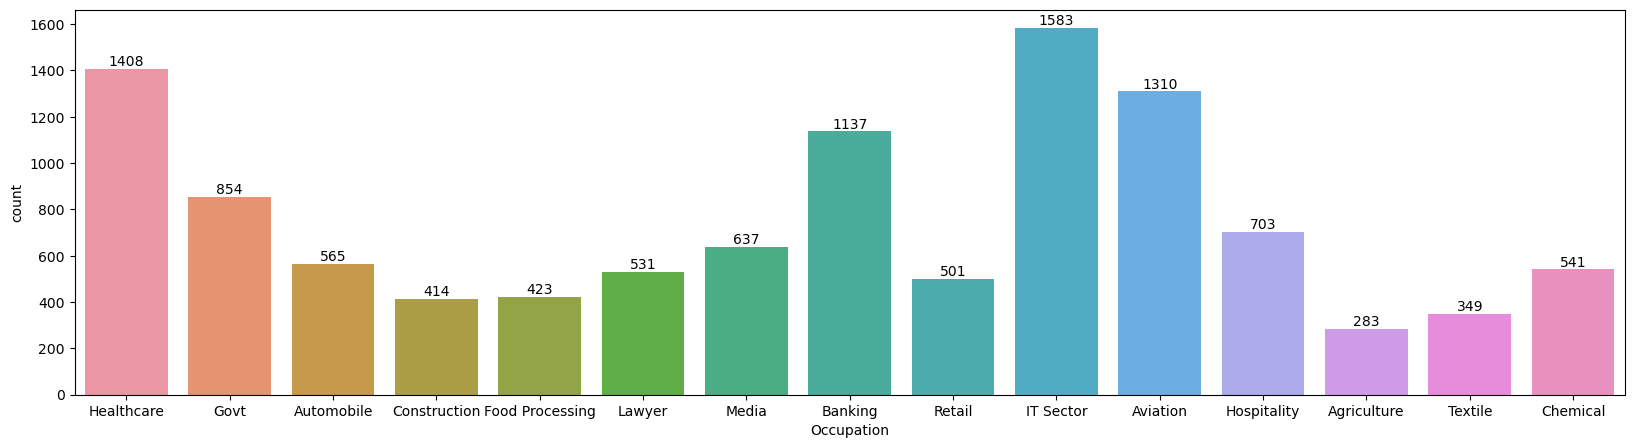

In [43]:
plt.figure(figsize= (20,5))
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

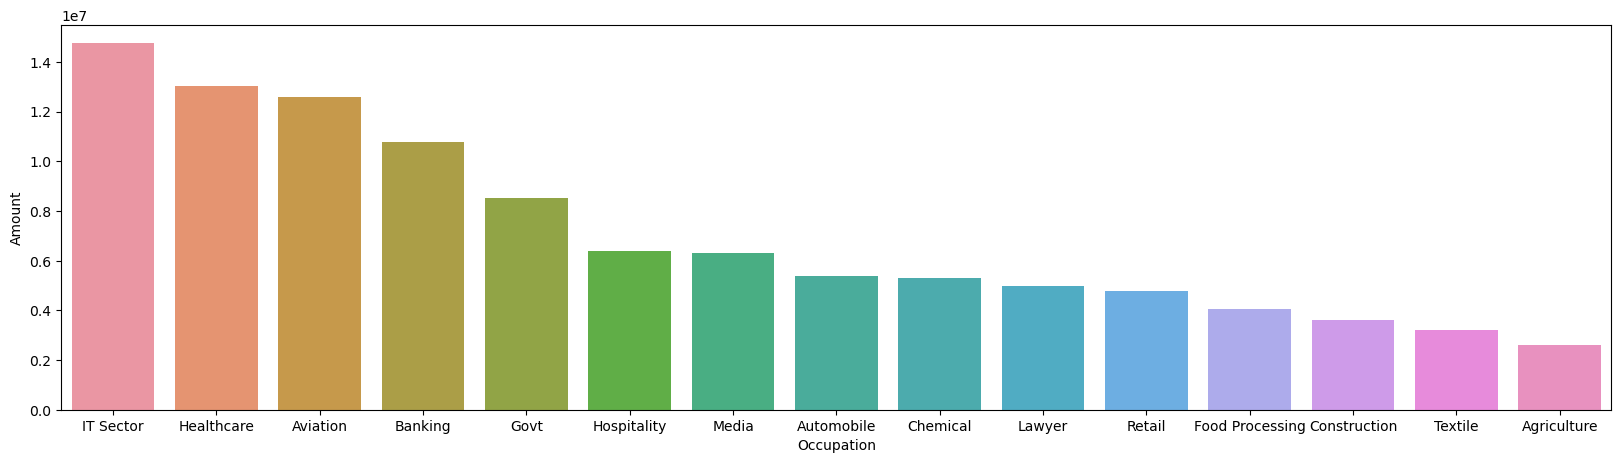

In [44]:
plt.figure(figsize= (20,5))
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

## Product Category

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Auto'),
  Text(1, 0, 'Hand & Power Tools'),
  Text(2, 0, 'Stationery'),
  Text(3, 0, 'Tupperware'),
  Text(4, 0, 'Footwear & Shoes'),
  Text(5, 0, 'Furniture'),
  Text(6, 0, 'Food'),
  Text(7, 0, 'Games & Toys'),
  Text(8, 0, 'Sports Products'),
  Text(9, 0, 'Books'),
  Text(10, 0, 'Electronics & Gadgets'),
  Text(11, 0, 'Decor'),
  Text(12, 0, 'Clothing & Apparel'),
  Text(13, 0, 'Beauty'),
  Text(14, 0, 'Household items'),
  Text(15, 0, 'Pet Care'),
  Text(16, 0, 'Veterinary'),
  Text(17, 0, 'Office')])

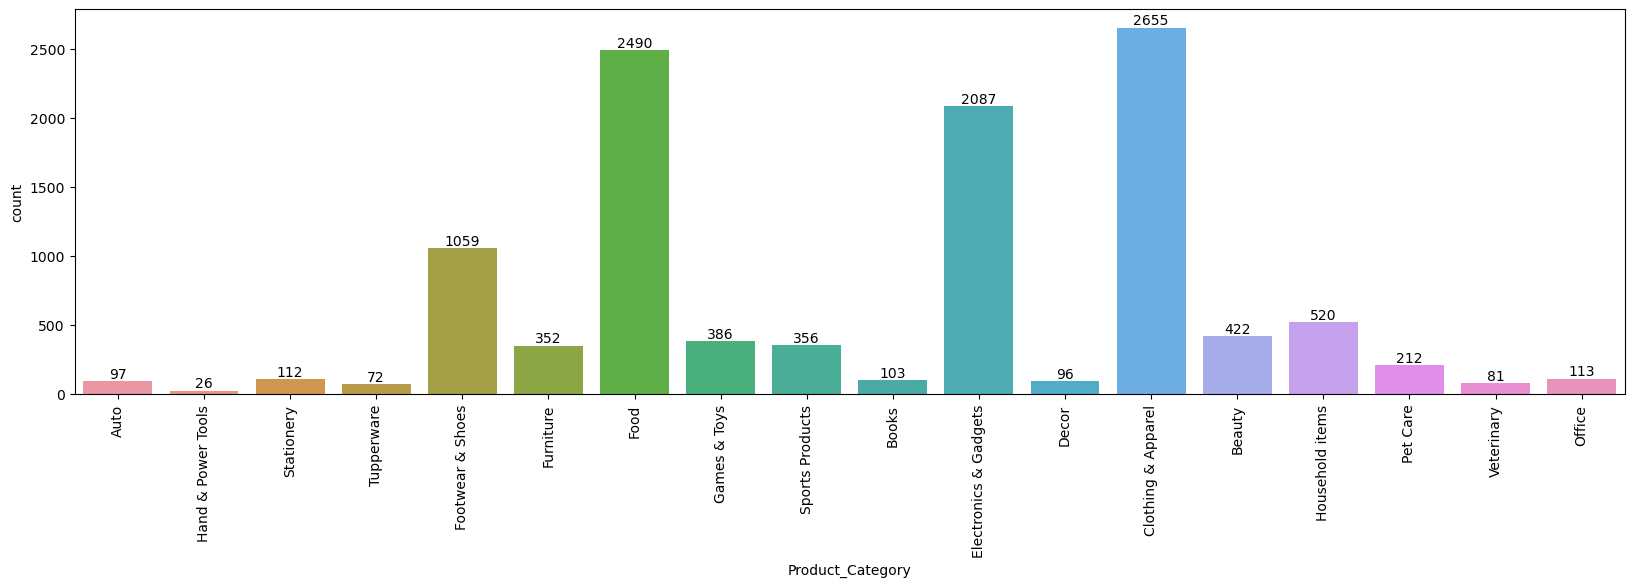

In [46]:
plt.figure(figsize= (20,5))
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation= 'vertical')    

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Food'),
  Text(1, 0, 'Clothing & Apparel'),
  Text(2, 0, 'Electronics & Gadgets'),
  Text(3, 0, 'Footwear & Shoes'),
  Text(4, 0, 'Furniture'),
  Text(5, 0, 'Games & Toys'),
  Text(6, 0, 'Sports Products'),
  Text(7, 0, 'Beauty'),
  Text(8, 0, 'Auto'),
  Text(9, 0, 'Stationery')])

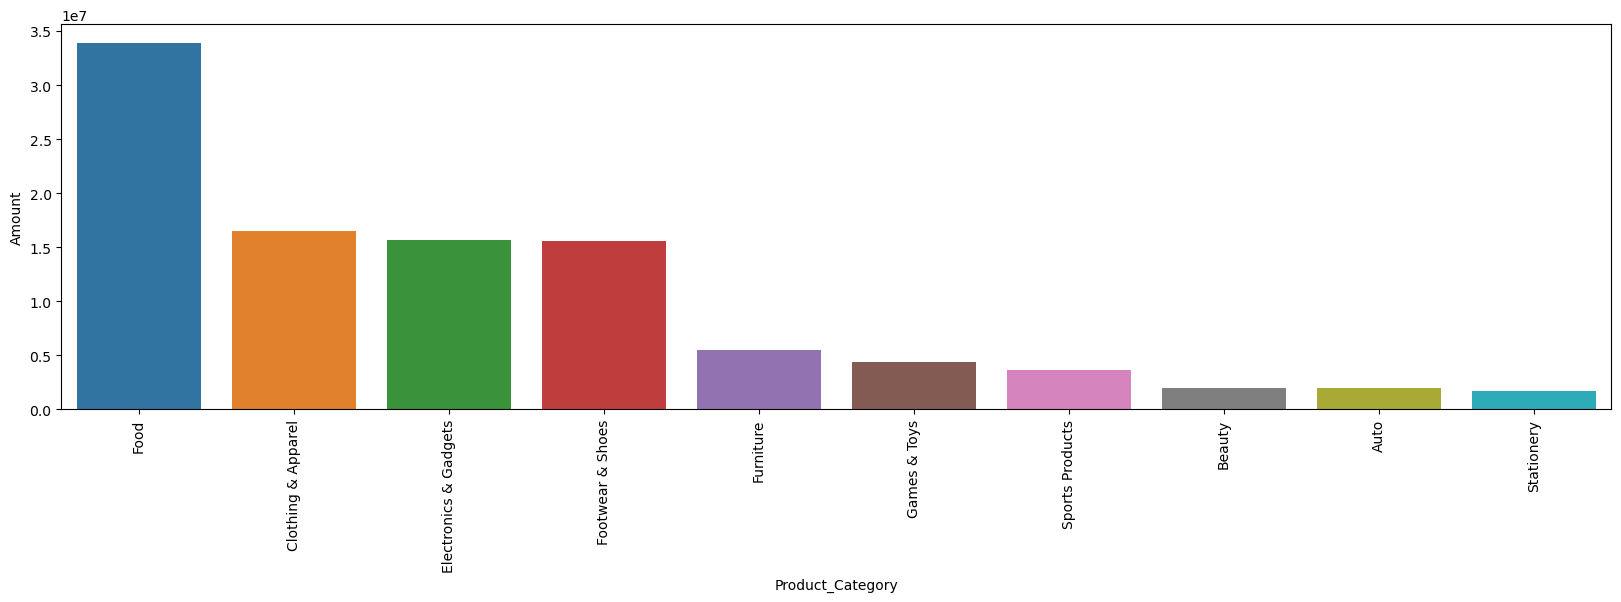

In [47]:
plt.figure(figsize= (20,5))
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')
plt.xticks(rotation= 'vertical')   

From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

# Conclusion

Unmarried women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category